In [58]:
# Imports
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import nltk
import joblib


# file path - this for linux windows you will need "//"
feature = ["permission" , "permission_number", "url_css", "check_css_for_script", "check_css_for_malicious_code", "js_check", 
           "js_url", "total_url", "premission_new","sus", "total_js", "label"]
f_path = "/home/rivka/Desktop/dataset.csv"
df = pd.read_csv(f_path,names= feature, header=None)


df["premission_new"] = df["premission_new"].fillna('null')
column = df['premission_new']
array = column.values
lst = array.tolist()
tokenized_text = [nltk.word_tokenize(sentence.lower()) for sentence in lst]
try_model = open("Word2Vec.pkl","rb")
try_clf = joblib.load(try_model)
new_value = []

for x in tokenized_text:
    new_value.append(try_clf.wv[x].sum())


df["premission_new"] = new_value

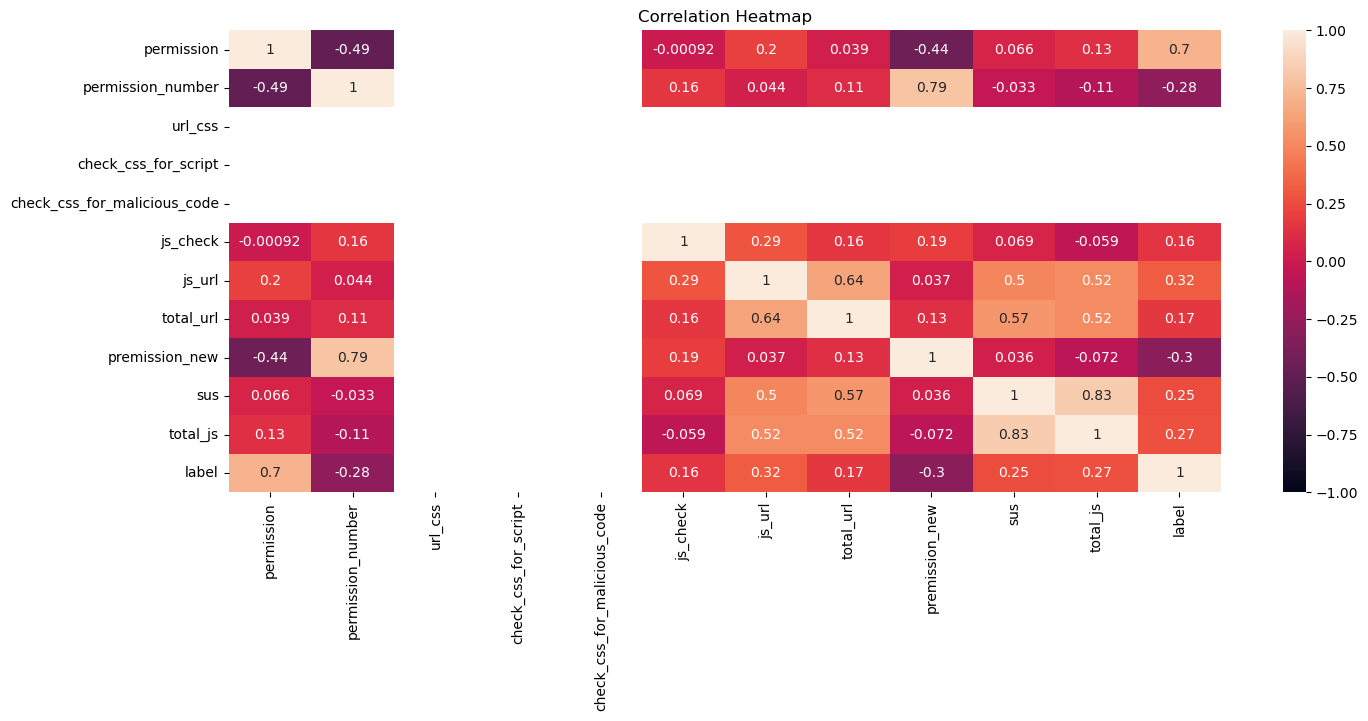

In [59]:
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

# Machine Learning

In [60]:
X = list(zip(df["permission_number"],df["js_check"], df["js_url"],df["total_url"], df["premission_new"]))
y = np.stack(df["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
clf1 = AdaBoostClassifier(n_estimators=95, random_state=0)
clf1.fit(X, y)
predictions1 = clf1.predict(X_test)

# save machine

In [61]:
model = open("AdaBoostClassifier.pkl","wb")
joblib.dump(clf1,model)
model.close()

# Confusion Matrix

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        59
           1    1.00000   1.00000   1.00000        14

    accuracy                        1.00000        73
   macro avg    1.00000   1.00000   1.00000        73
weighted avg    1.00000   1.00000   1.00000        73



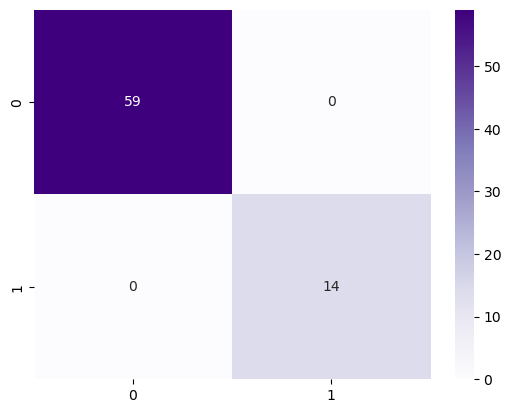

In [62]:
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions1)
clf_report = classification_report(true_labels, predictions1, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Purples', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

print(clf_report)